_The dataset we are using for this is the calafornia housing prices data from kaggle._

In [1]:
import pandas as pd
housing = pd.read_csv(r"C:\Users\Bharath\OneDrive\Desktop\Machine_Learning_Book\housing.csv")

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


__The head function in pandas is very usefull to understand the nature of the data that we are dealing with.__ From the above table we can see that ocean_proximity is clegorical. It is text based and most algorithims find it dificult to process text based information. We can migate this by using __one hot encoding__. We will discuss one hot encoding further on. We can also see that the values in the field median_income have all be scaled to a min value of 5 and a max value of 15. _It is important to have an understanding of the data. This allows us to pick out the right algorithim and also perform the data pre-processing_. 

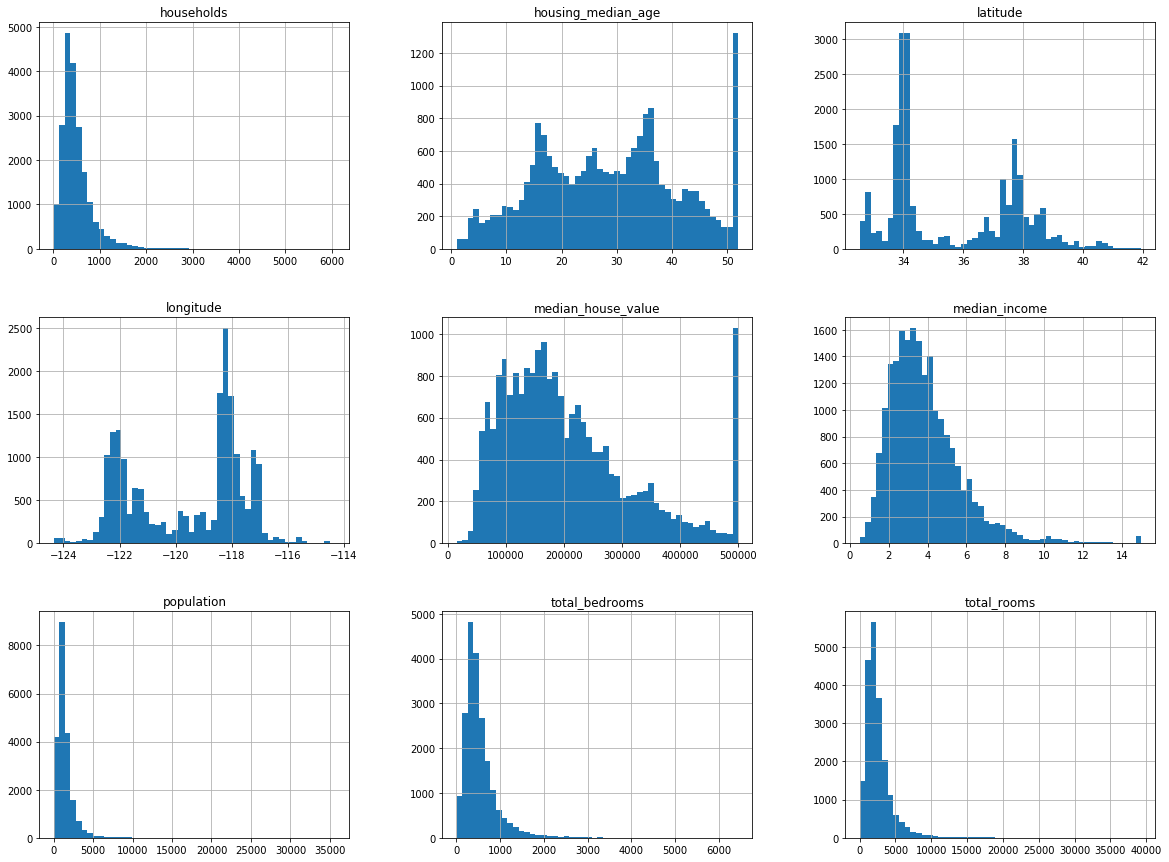

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50,figsize=(20,15))
plt.show()

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can see in the above data that there are 207 data points missing under total_bedrooms. Now while giving data to a predition algorithim we need handle missing data.

We can do this in multiple ways. Let's discuss the best aproaches to solving this problem:
1. We can remove the entire row that has a null value.
2. We can replace the null value with mean or mode of the entire column.

## Importance of test data:

It is important to note that before we proceed to making changes to the data, we should separate out the training and test set of data. This is help us test our algorithim post the training process.

It is important to split the test data early on and keep it aside. To make sure that it never intereferes with our algorithims. ***An interference can cause the algorithim to predict better on the test data, but this might not be the true acuracy of our algorithim.***. This algorithim when deployed can produce a high errror percentage on real world data. This is called over-fitting. The algorithims parameters and hyper-parameters are tunned specific to the training and test data. This makes it is a bad general model and more specifically tuned to predict the acurate results for the dataset that the algorithim was trained on.

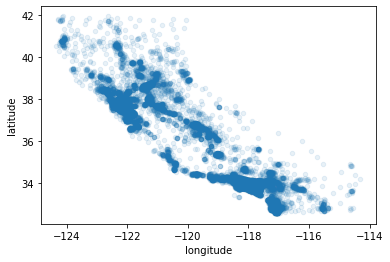

In [5]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=.1)

In [6]:
housing['total_bedrooms'].head()

0     129.0
1    1106.0
2     190.0
3     235.0
4     280.0
Name: total_bedrooms, dtype: float64

In [7]:
import numpy as np
mean = int(np.mean(housing['total_bedrooms']))

In [8]:
housing['total_bedrooms'].fillna(mean,inplace=True)

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


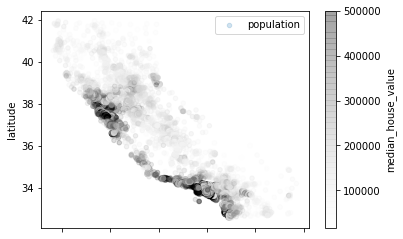

In [10]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, label="population", c="median_house_value", colorbar=True,
)
plt.legend()

In [11]:
corr_values = housing.corr()

In [14]:
cor = corr_values['median_house_value'].sort_values()
cor

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049454
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

### Corelation:
Correlation is an important concept, it helps us understand how two features interact with each other. In the above result we can see that 'median_house_value' has a correlation of 1 with itself. The range of correlation is between -1 and 1. 1 meaning a strong +ve correlation. In the above dataset we can see that 'median_income' and 'meadian_housing_value' have a correlation of +.688, this means that is one of them increases the other increases, but not by the same value. Most other fields have little to none correlation with 'median_house_value'.

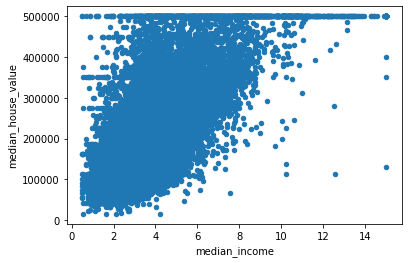

In [19]:
housing.plot(kind='scatter',x='median_income',y='median_house_value')

We can see from the above image how there is a clear trend. The values of 'median_house_value' and 'median_income' increase simultaniously. 